In [152]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [153]:


dataset = pd.read_csv("./Iris.csv")


In [154]:
dataset.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


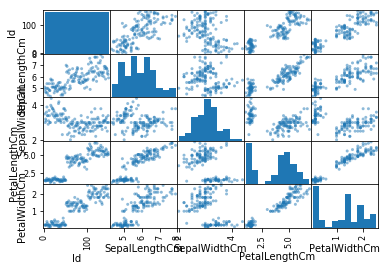

In [155]:
scatter_matrix(dataset)
plt.show()

## 用不同的机器学习算法进行分类预测最优模型

In [156]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [157]:
seed=7
scoring="accuracy"


In [158]:
models=[]
models.append(("LR",LogisticRegression(solver="liblinear"))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))


SyntaxError: invalid syntax (<ipython-input-158-247cb5700a96>, line 3)

In [159]:
for name,model in models:
    print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='over', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
GaussianNB(priors=None)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,


In [151]:
result=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train.astype("int"),cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
   

ValueError: multi_class should be either multinomial or ovr, got over